In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cidade = 'sao_paulo'
lista_arquivos = os.listdir('MYs/')

In [3]:
df = pd.DataFrame()
for filename in lista_arquivos:
    if filename.endswith(".epw"): 
        #print(filename)
        df_temp = pd.read_csv(f"MYs/{filename}", sep=',', skiprows=8, header=None)
        df = pd.concat([df,df_temp])
        continue
    else:
        continue

In [4]:
#df.to_csv('all_MYs.csv', index=False)

In [5]:
all_MYs = pd.read_csv('all_MYs.csv')
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1988,1,1,1,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,19.6,91,91590,...,143,9,999999999,0,0.164,0,88,0.15,0.0,0.0
1,1988,1,1,2,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.2,19.7,91,91559,...,42,9,999999999,0,0.164,0,88,0.15,0.0,0.0
2,1988,1,1,3,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,20.8,19.7,93,91529,...,93,9,999999999,0,0.164,0,88,0.15,0.1,0.0
3,1988,1,1,4,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,20.1,94,91487,...,37,9,999999999,0,0.164,0,88,0.15,0.3,0.0
4,1988,1,1,5,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.0,20.0,94,91504,...,36,9,999999999,0,0.164,0,88,0.15,0.4,0.0


In [6]:
all_MYs['1'] = all_MYs['1'].map("{:02}".format)
all_MYs['2'] = all_MYs['2'].map("{:02}".format)
all_MYs['3'] = all_MYs['3'].map("{:02}".format)

all_MYs['3'] = all_MYs['3'].replace(['24'],'00')

all_MYs['35'] = all_MYs['0'].map(str)+'-'+all_MYs['1'].map(str)+'-'+all_MYs['2'].map(str)+' '+all_MYs['3'].map(str)+':00:00'

In [7]:
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1988,01,01,01,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,19.6,91,91590,...,9,999999999,0,0.164,0,88,0.15,0.0,0.0,1988-01-01 01:00:00
1,1988,01,01,02,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.2,19.7,91,91559,...,9,999999999,0,0.164,0,88,0.15,0.0,0.0,1988-01-01 02:00:00
2,1988,01,01,03,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,20.8,19.7,93,91529,...,9,999999999,0,0.164,0,88,0.15,0.1,0.0,1988-01-01 03:00:00
3,1988,01,01,04,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,20.1,94,91487,...,9,999999999,0,0.164,0,88,0.15,0.3,0.0,1988-01-01 04:00:00
4,1988,01,01,05,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.0,20.0,94,91504,...,9,999999999,0,0.164,0,88,0.15,0.4,0.0,1988-01-01 05:00:00


In [8]:
all_MYs['35'] = pd.to_datetime(all_MYs['35'], format = "%Y/%m/%d %H:%M:%S")

In [9]:
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1988,01,01,01,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,19.6,91,91590,...,9,999999999,0,0.164,0,88,0.15,0.0,0.0,1988-01-01 01:00:00
1,1988,01,01,02,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.2,19.7,91,91559,...,9,999999999,0,0.164,0,88,0.15,0.0,0.0,1988-01-01 02:00:00
2,1988,01,01,03,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,20.8,19.7,93,91529,...,9,999999999,0,0.164,0,88,0.15,0.1,0.0,1988-01-01 03:00:00
3,1988,01,01,04,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.1,20.1,94,91487,...,9,999999999,0,0.164,0,88,0.15,0.3,0.0,1988-01-01 04:00:00
4,1988,01,01,05,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,21.0,20.0,94,91504,...,9,999999999,0,0.164,0,88,0.15,0.4,0.0,1988-01-01 05:00:00


<AxesSubplot:xlabel='35'>

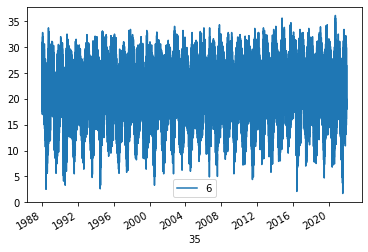

In [10]:
all_MYs.plot(x='35', y="6")

In [11]:
year_TBS = pd.DataFrame()
year_TBS['mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].mean()
year_TBS['median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].median()
year_TBS['max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].max()
year_TBS['min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].min()
year_TBS.reset_index(level=0, inplace=True)
year_TBS = year_TBS.rename({'35': 'year'}, axis='columns')
year_TBS.head()

,year,mean,median,max,min
0,1988,19.234176,19.3,33.7,2.5
1,1989,18.991575,19.4,31.1,5.6
2,1990,19.606507,20.0,32.5,3.3
3,1991,19.444361,19.5,31.5,5.5
4,1992,19.473657,19.4,30.9,6.4


<AxesSubplot:>

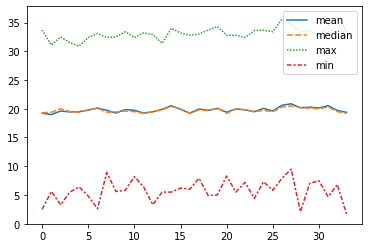

In [12]:
sns.lineplot(data=year_TBS)

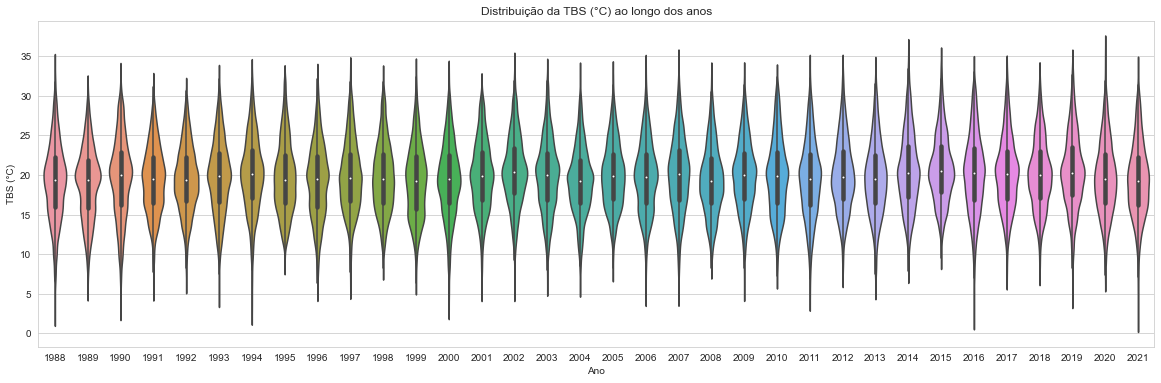

In [13]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="6",data=all_MYs, dodge=False)
plt.title("Distribuição da TBS (°C) ao longo dos anos")
plt.ylabel("TBS (°C)")
plt.xlabel("Ano")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_tbs.png', bbox_inches='tight', dpi=300) 

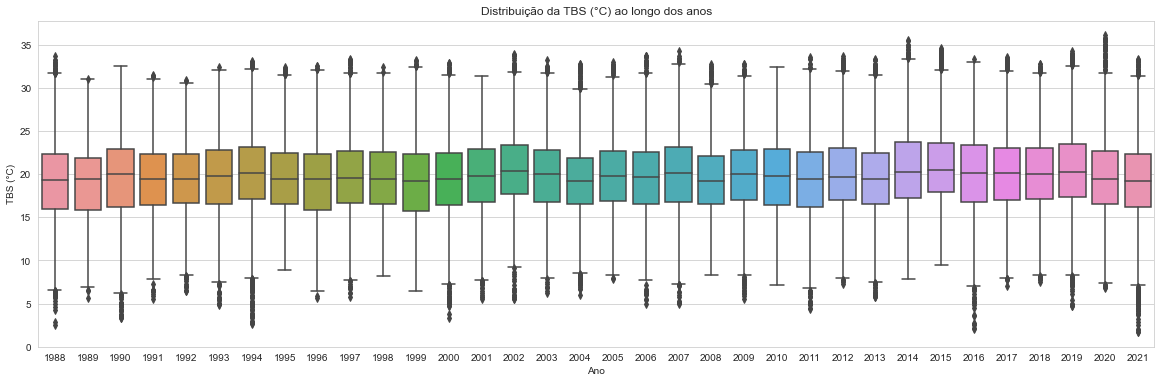

In [14]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.boxplot(x="0", y="6",data=all_MYs, dodge=False)
plt.title("Distribuição da TBS (°C) ao longo dos anos")
plt.ylabel("TBS (°C)")
plt.xlabel("Ano")
plt.show()

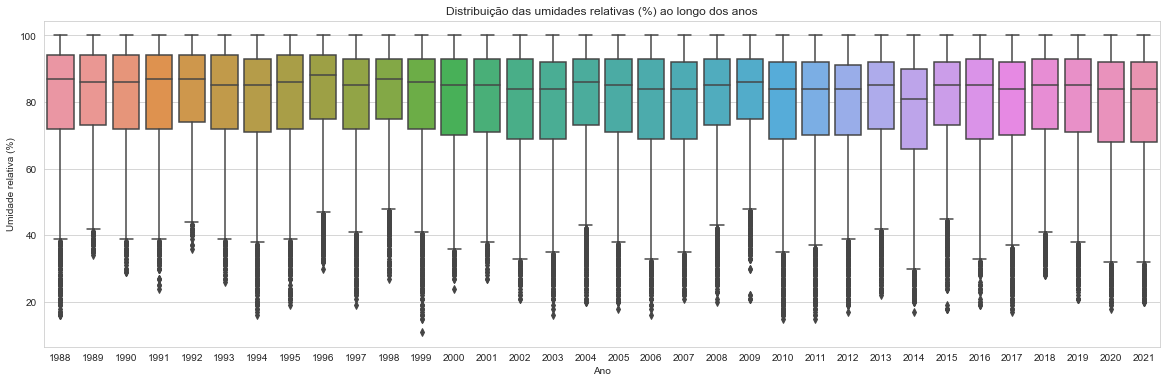

In [15]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
g = sns.boxplot(x="0", y="8",data=all_MYs, dodge=False)
plt.title("Distribuição das umidades relativas (%) ao longo dos anos")
plt.ylabel("Umidade relativa (%)")
plt.xlabel("Ano")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_boxplot_ur.png', bbox_inches='tight', dpi=300) 

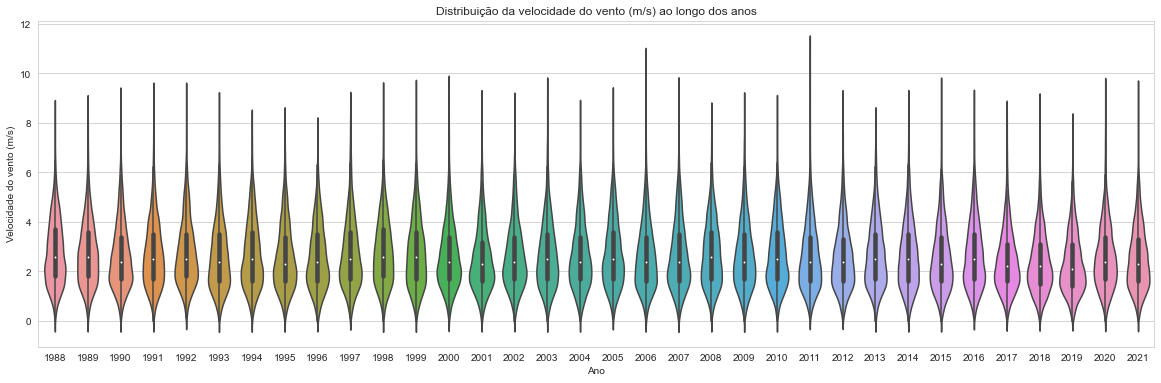

In [16]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="21",data=all_MYs, dodge=False)
plt.title("Distribuição da velocidade do vento (m/s) ao longo dos anos")
plt.ylabel("Velocidade do vento (m/s)")
plt.xlabel("Ano")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_ws.png', bbox_inches='tight', dpi=300) 

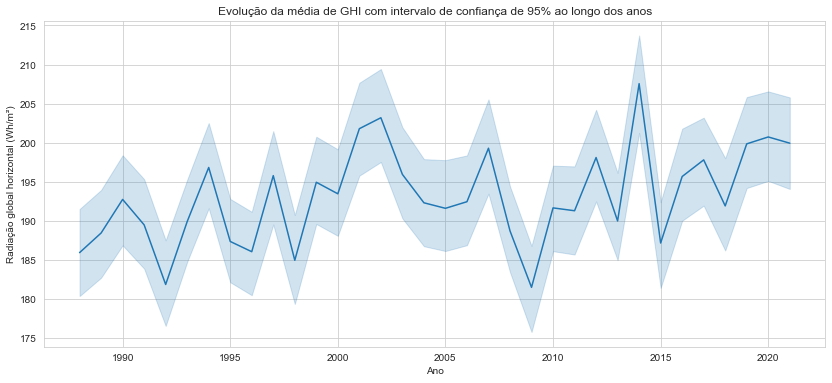

In [17]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="0", y="13")
plt.title("Evolução da média de GHI com intervalo de confiança de 95% ao longo dos anos")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Ano")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi.png', bbox_inches='tight', dpi=300) 

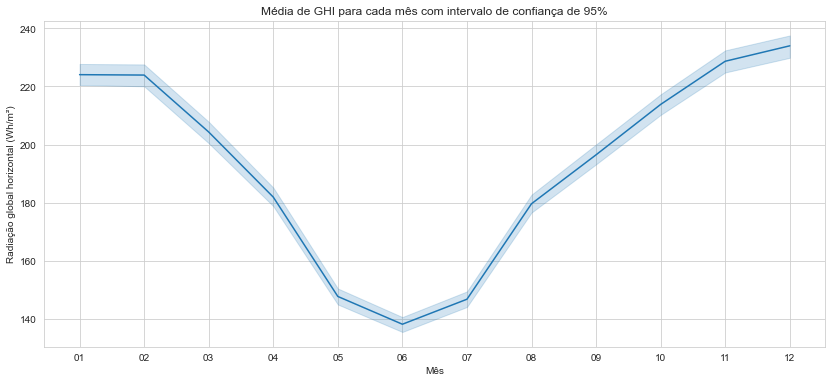

In [18]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="1", y="13")
plt.title("Média de GHI para cada mês com intervalo de confiança de 95%")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Mês")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi_month.png', bbox_inches='tight', dpi=300) 

In [19]:
palette_year = ['#ff0000', # Janeiro  
                '#ff6800',  # Fevereiro        
                '#ffc900',  # Março
                '#fff300',  # Abril
                '#8fff00',  # Maio
                '#27b600',  # Junho
                '#00af67',  # Julho                               
                '#009faf',  # Agosto
                '#0062af',  # Setembro
                '#d6c000',  # Outubro
                '#d69800',  # Novembro
                '#d66500',  # Dezembro                                
                   ]

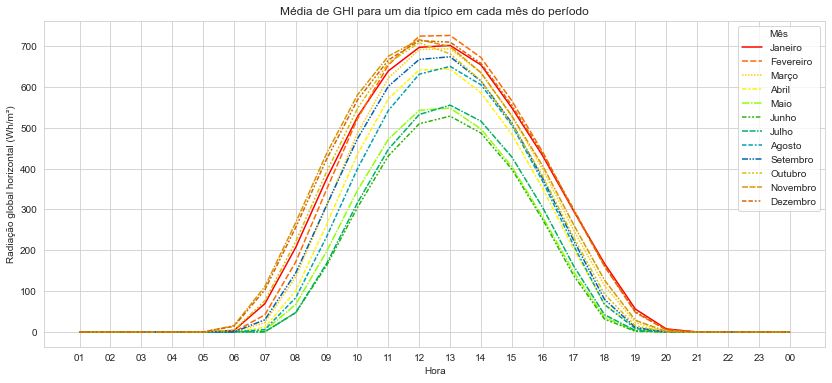

In [20]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="3", y="13", hue='1', style="1", palette=palette_year, ci=None)
plt.title("Média de GHI para um dia típico em cada mês do período")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Hora")
plt.legend(title='Mês', labels=['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi_day.png', bbox_inches='tight', dpi=300) 

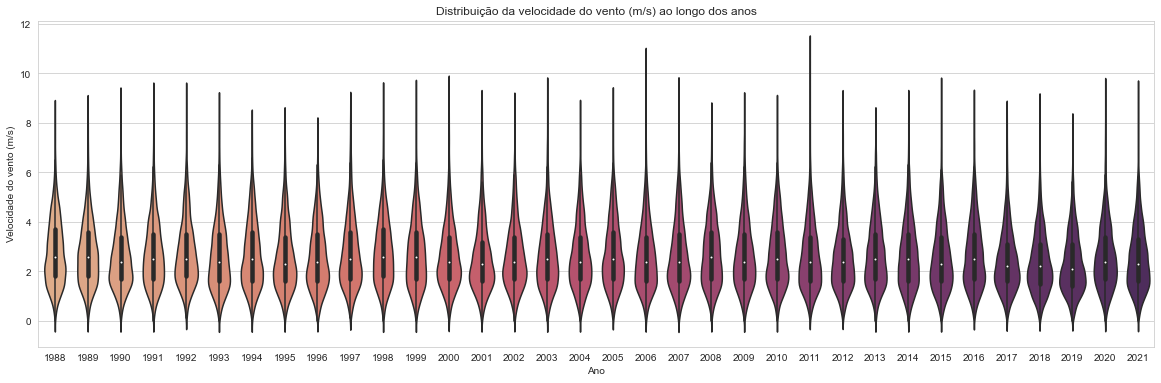

In [21]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="21",data=all_MYs, dodge=False, palette='flare')
plt.title("Distribuição da velocidade do vento (m/s) ao longo dos anos")
plt.ylabel("Velocidade do vento (m/s)")
plt.xlabel("Ano")
plt.show()


In [22]:
month_MYs = pd.DataFrame()
month_MYs['TBS_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].mean()
month_MYs['TBS_median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].median()
month_MYs['TBS_max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].max()
month_MYs['TBS_min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].min()
month_MYs['GHI_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].mean()
month_MYs['GHI_median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].median()
month_MYs['GHI_max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].max()
month_MYs['GHI_min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].min()
month_MYs.reset_index(level=0, inplace=True)
month_MYs = month_MYs.rename({'35': 'timeperiod'}, axis='columns')
month_MYs['year'] = month_MYs['timeperiod'].dt.year
month_MYs['month'] = month_MYs['timeperiod'].dt.month
month_MYs.head()

,timeperiod,TBS_mean,TBS_median,TBS_max,TBS_min,GHI_mean,GHI_median,GHI_max,GHI_min,year,month
0,1988-01,23.694892,23.0,32.8,17.0,253.440860,44.5,1066,0,1988,1
1,1988-02,21.629885,21.0,29.5,16.9,177.882184,20.0,970,0,1988,2
2,1988-03,22.113441,21.4,30.6,15.0,216.737903,8.0,997,0,1988,3
3,1988-04,20.133472,19.8,28.6,13.9,138.912500,2.0,877,0,1988,4
4,1988-05,17.705645,17.5,27.4,9.9,109.657258,0.0,753,0,1988,5


In [23]:
month_TBS_mean = month_MYs.pivot("month", "year", "TBS_mean")
month_TBS_mean.head()

year,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,,,,,,
1,23.694892,22.375538,23.358871,21.465457,21.827688,22.678091,21.750134,23.488038,23.158199,22.261156,...,20.818548,21.395968,24.109677,24.674731,22.687500,22.946237,22.606720,24.380376,22.376882,23.415726
2,21.629885,22.341369,22.645238,21.657738,22.466523,21.758333,24.294345,22.448363,22.723276,22.827976,...,23.688218,23.286310,24.549107,23.093304,23.914799,24.006101,22.067411,22.531101,21.470833,21.937500
3,22.113441,22.005376,22.723253,21.017070,21.750806,22.183199,21.360887,21.538306,21.821371,20.865995,...,21.760081,21.574731,22.214382,21.938441,22.855511,21.933737,23.298387,22.340323,20.840860,22.645027
4,20.133472,21.008889,22.096806,20.063194,20.355972,21.035556,20.194167,19.898056,20.435556,19.677083,...,20.542639,19.401806,20.309028,20.661806,23.165417,20.170139,20.661667,21.838889,19.004028,18.951111
5,17.705645,17.210887,17.067608,18.114247,19.113710,17.996505,19.324328,17.713710,16.996640,17.458468,...,17.370296,18.088575,18.298253,18.445027,17.857661,18.685349,18.568817,19.892742,16.467204,17.479839


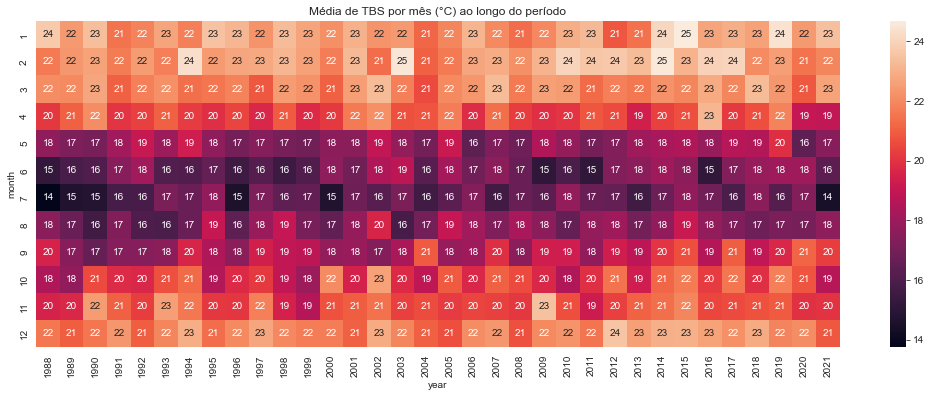

In [24]:
month_TBS_mean = month_MYs.pivot("month", "year", "TBS_mean")

plt.figure(figsize=(18,6))
g = sns.heatmap(month_TBS_mean, annot=True)
plt.title("Média de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_TBS_month_mean.png', bbox_inches='tight', dpi=300) 

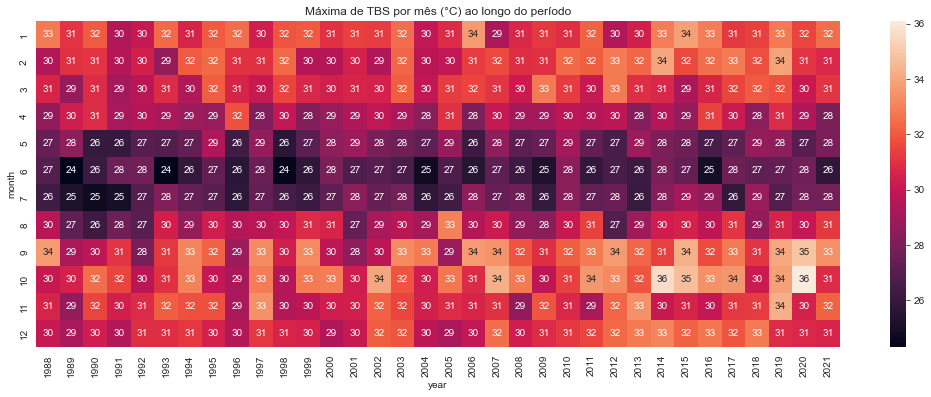

In [25]:
month_TBS_max = month_MYs.pivot("month", "year", "TBS_max")

plt.figure(figsize=(18,6))
g = sns.heatmap(month_TBS_max, annot=True)
plt.title("Máxima de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_TBS_month_max.png', bbox_inches='tight', dpi=300) 

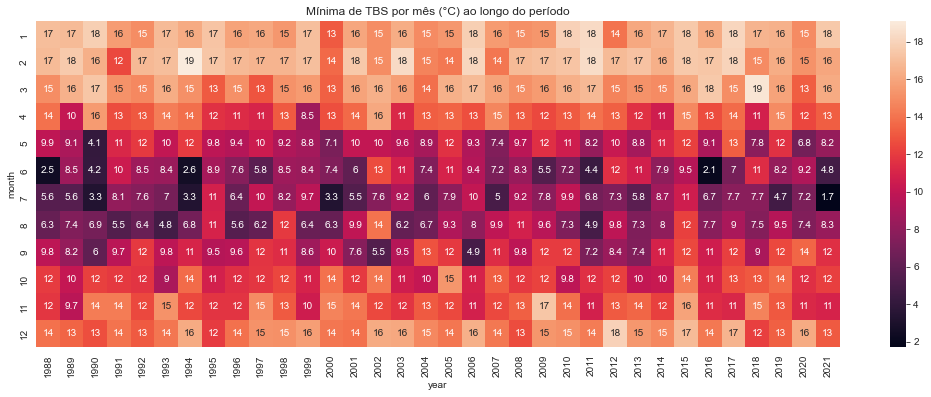

In [26]:
month_TBS_max = month_MYs.pivot("month", "year", "TBS_min")

plt.figure(figsize=(18,6))
g = sns.heatmap(month_TBS_max, annot=True)
plt.title("Mínima de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade + '_heatmap_TBS_month_min.png', bbox_inches='tight', dpi=300) 

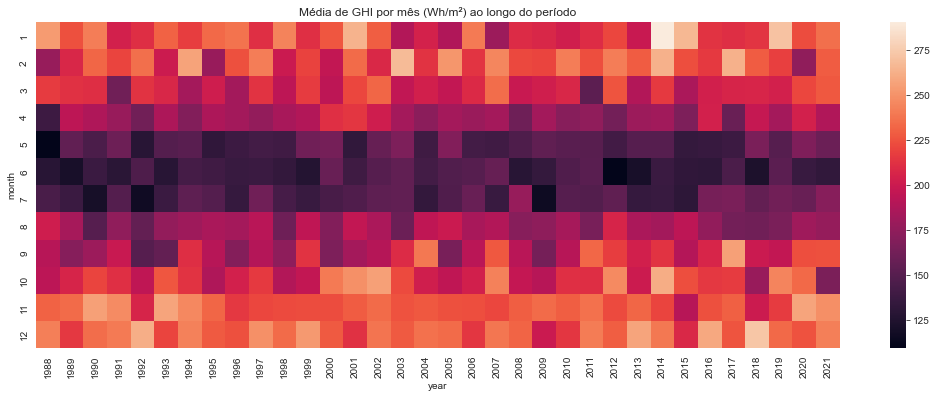

In [27]:
month_GHI_mean = month_MYs.pivot("month", "year", "GHI_mean")

plt.figure(figsize=(18,6))
g = sns.heatmap(month_GHI_mean)
plt.title("Média de GHI por mês (Wh/m²) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_GHI_month_mean.png', bbox_inches='tight', dpi=300) 

In [28]:
hour_MYs = pd.DataFrame()
hour_MYs['TBS_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="H"))['6'].mean()
hour_MYs.reset_index(level=0, inplace=True)
hour_MYs = hour_MYs.rename({'35': 'timeperiod'}, axis='columns')
hour_MYs['year'] = hour_MYs['timeperiod'].dt.year
hour_MYs['month'] = hour_MYs['timeperiod'].dt.month
hour_MYs['day'] = hour_MYs['timeperiod'].dt.day
hour_MYs['hour'] = hour_MYs['timeperiod'].dt.hour
hour_MYs['year_month_day'] = hour_MYs['year'].astype(str) + '_' + hour_MYs['month'].astype(str) + '_' + hour_MYs['day'].astype(str)
hour_MYs.head()

,timeperiod,TBS_mean,year,month,day,hour,year_month_day
0,1988-01-01 00:00,20.4,1988,1,1,0,1988_1_1
1,1988-01-01 01:00,21.1,1988,1,1,1,1988_1_1
2,1988-01-01 02:00,21.2,1988,1,1,2,1988_1_1
3,1988-01-01 03:00,20.8,1988,1,1,3,1988_1_1
4,1988-01-01 04:00,21.1,1988,1,1,4,1988_1_1


In [29]:
hour_TBS_mean = hour_MYs.pivot("hour", "year_month_day", "TBS_mean")
hour_TBS_mean.head()

year_month_day,1988_10_1,1988_10_10,1988_10_11,1988_10_12,1988_10_13,1988_10_14,1988_10_15,1988_10_16,1988_10_17,1988_10_18,...,2021_9_28,2021_9_29,2021_9_3,2021_9_30,2021_9_4,2021_9_5,2021_9_6,2021_9_7,2021_9_8,2021_9_9
hour,,,,,,,,,,,,,,,,,,,,,
0,18.0,14.4,15.1,14.3,14.5,14.9,17.7,15.6,15.5,16.9,...,20.5,17.2,18.9,17.3,16.5,18.6,17.6,17.6,21.8,19.5
1,15.5,16.5,13.6,15.5,13.9,13.5,14.3,16.8,15.6,15.4,...,17.7,19.5,16.4,16.9,17.1,16.2,17.5,17.0,17.1,20.9
2,15.4,16.5,13.5,15.4,13.9,13.5,14.2,16.8,15.6,15.4,...,17.6,19.4,16.1,16.7,16.8,16.0,17.4,16.6,17.0,20.6
3,15.6,15.9,13.0,15.1,13.6,13.3,13.7,15.7,15.4,15.4,...,16.6,18.2,15.7,16.4,16.4,15.8,16.9,16.1,17.0,20.3
4,15.8,15.7,13.2,15.1,13.3,13.1,13.2,15.0,15.3,15.2,...,15.7,17.1,15.3,16.0,15.3,15.3,15.8,15.9,17.0,19.2


(array([5.00000e-01, 1.56500e+02, 3.12500e+02, 4.68500e+02, 6.24500e+02,
        7.80500e+02, 9.36500e+02, 1.09250e+03, 1.24850e+03, 1.40450e+03,
        1.56050e+03, 1.71650e+03, 1.87250e+03, 2.02850e+03, 2.18450e+03,
        2.34050e+03, 2.49650e+03, 2.65250e+03, 2.80850e+03, 2.96450e+03,
        3.12050e+03, 3.27650e+03, 3.43250e+03, 3.58850e+03, 3.74450e+03,
        3.90050e+03, 4.05650e+03, 4.21250e+03, 4.36850e+03, 4.52450e+03,
        4.68050e+03, 4.83650e+03, 4.99250e+03, 5.14850e+03, 5.30450e+03,
        5.46050e+03, 5.61650e+03, 5.77250e+03, 5.92850e+03, 6.08450e+03,
        6.24050e+03, 6.39650e+03, 6.55250e+03, 6.70850e+03, 6.86450e+03,
        7.02050e+03, 7.17650e+03, 7.33250e+03, 7.48850e+03, 7.64450e+03,
        7.80050e+03, 7.95650e+03, 8.11250e+03, 8.26850e+03, 8.42450e+03,
        8.58050e+03, 8.73650e+03, 8.89250e+03, 9.04850e+03, 9.20450e+03,
        9.36050e+03, 9.51650e+03, 9.67250e+03, 9.82850e+03, 9.98450e+03,
        1.01405e+04, 1.02965e+04, 1.04525e+04, 1.06

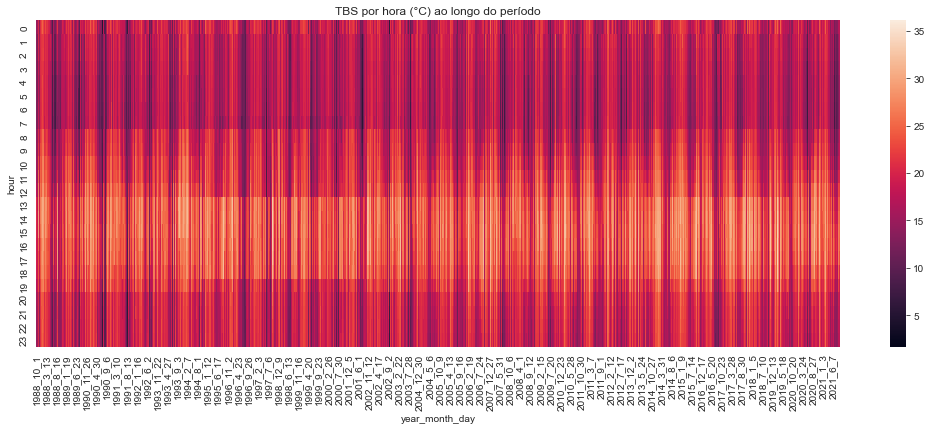

In [30]:
plt.figure(figsize=(18,6))
g = sns.heatmap(hour_TBS_mean)
plt.title("TBS por hora (°C) ao longo do período")
plt.xticks(rotation=90)

#fig = g.get_figure()
#fig.savefig('sao_paulo'+'_heatmap_TBS_hour.png', bbox_inches='tight', dpi=300) 